<a href="https://colab.research.google.com/github/FelipeVillegasH/Graphic_analysis_Global_temperature_Changes/blob/main/Graphic_analysis_Global_temperature_Changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Graphic analysis Global temperature Changes
#By Felipe Villegas
##Created: 23.01.2022

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/tareas/core/Semana 3 Graphics/Global Temperature Anomalies.csv')

In [112]:
df

,Hemisphere,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,Global,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,-0.13,-0.22,-0.20,-0.16,-0.16,NaN,NaN,-0.10,-0.15,-0.18
1,Global,1881,-0.18,-0.13,0.04,0.06,0.08,-0.17,0.02,-0.02,-0.14,-0.20,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17
2,Global,1882,0.18,0.15,0.06,-0.15,-0.13,-0.21,-0.15,-0.06,-0.13,-0.23,-0.15,-0.34,-0.10,-0.07,0.09,-0.08,-0.14,-0.17
3,Global,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.12,-0.20,-0.10,-0.22,-0.10,-0.16,-0.18,-0.33,-0.15,-0.08,-0.17
4,Global,1884,-0.12,-0.07,-0.36,-0.39,-0.33,-0.34,-0.32,-0.27,-0.26,-0.24,-0.32,-0.30,-0.28,-0.26,-0.10,-0.36,-0.31,-0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Southern,2016,0.80,0.79,0.79,0.74,0.81,0.51,0.67,0.92,0.60,0.74,0.70,0.69,0.73,0.74,0.79,0.78,0.70,0.68
419,Southern,2017,0.65,0.76,0.80,0.69,0.90,0.53,0.67,0.73,0.55,0.75,0.53,0.47,0.67,0.69,0.70,0.80,0.64,0.61
420,Southern,2018,0.48,0.45,0.61,0.80,0.63,0.69,0.75,0.65,0.64,0.79,0.69,0.74,0.66,0.64,0.47,0.68,0.70,0.71
421,Southern,2019,0.66,0.78,0.80,0.77,0.73,0.65,0.86,0.79,0.64,0.72,0.81,0.79,0.75,0.75,0.73,0.77,0.77,0.72


In [113]:
df.info()
# the data expresses monthly, seasonal, and yearly temperature means, the last columns are grouped by months for instance: 
# J-D stands for january to december

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hemisphere  423 non-null    object 
 1   Year        423 non-null    int64  
 2   Jan         423 non-null    float64
 3   Feb         423 non-null    float64
 4   Mar         423 non-null    float64
 5   Apr         423 non-null    float64
 6   May         423 non-null    float64
 7   Jun         423 non-null    float64
 8   Jul         423 non-null    float64
 9   Aug         423 non-null    float64
 10  Sep         423 non-null    float64
 11  Oct         423 non-null    float64
 12  Nov         423 non-null    float64
 13  Dec         423 non-null    float64
 14  J-D         423 non-null    float64
 15  D-N         420 non-null    float64
 16  DJF         420 non-null    float64
 17  MAM         423 non-null    float64
 18  JJA         423 non-null    float64
 19  SON         423 non-null    f

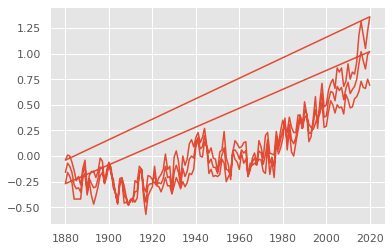

In [114]:
# With this graphic we can see that the average change by year has been increasing
plt.plot(df['Year'], df['J-D'])
# But a line plot is not a good option for a graphic because the data tends to be cyclic

In [115]:
#Therefore, we set a filter to take all the months 
df2=Month_filter=df.loc[:,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]
Month_filter

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,-0.13,-0.22,-0.20
1,-0.18,-0.13,0.04,0.06,0.08,-0.17,0.02,-0.02,-0.14,-0.20,-0.17
2,0.18,0.15,0.06,-0.15,-0.13,-0.21,-0.15,-0.06,-0.13,-0.23,-0.15
3,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.12,-0.20,-0.10,-0.22
4,-0.12,-0.07,-0.36,-0.39,-0.33,-0.34,-0.32,-0.27,-0.26,-0.24,-0.32
...,...,...,...,...,...,...,...,...,...,...,...
418,0.80,0.79,0.79,0.74,0.81,0.51,0.67,0.92,0.60,0.74,0.70
419,0.65,0.76,0.80,0.69,0.90,0.53,0.67,0.73,0.55,0.75,0.53
420,0.48,0.45,0.61,0.80,0.63,0.69,0.75,0.65,0.64,0.79,0.69
421,0.66,0.78,0.80,0.77,0.73,0.65,0.86,0.79,0.64,0.72,0.81


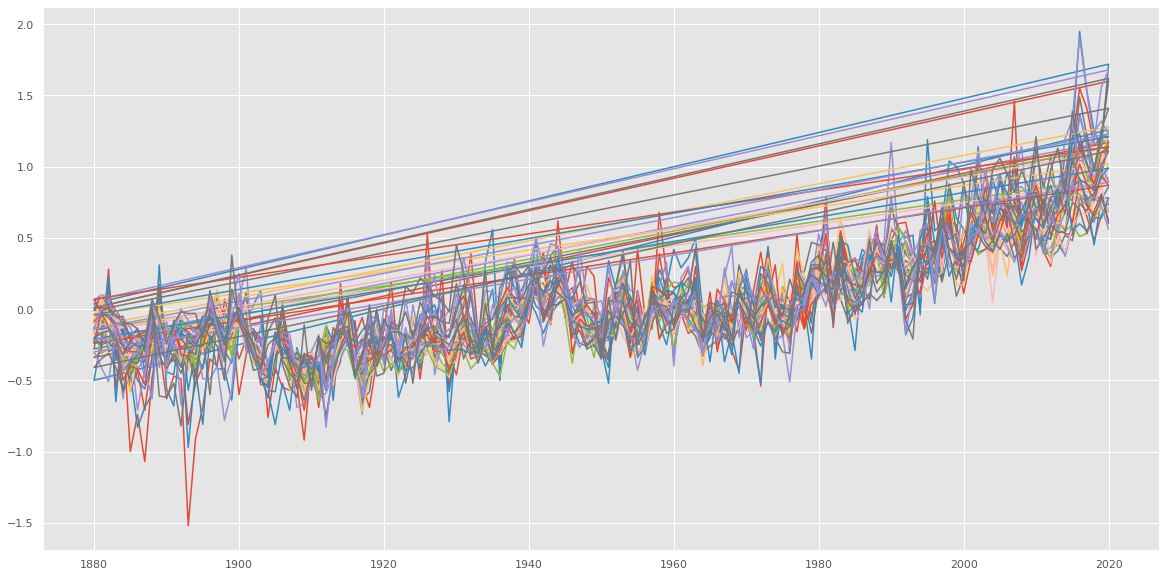

In [116]:
# The data Still presented Cyclic even when we exclude December from the filter
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 10))
plt.plot(df['Year'],df2);

In [117]:
from platform import platform
Year_total_average=df.groupby(['Year'])['J-D'].sum()
Year_total_average

Year
1880   -0.47
1881   -0.22
1882   -0.30
1883   -0.48
1884   -0.84
        ... 
2016    3.06
2017    2.78
2018    2.56
2019    2.96
2020    3.07
Name: J-D, Length: 141, dtype: float64

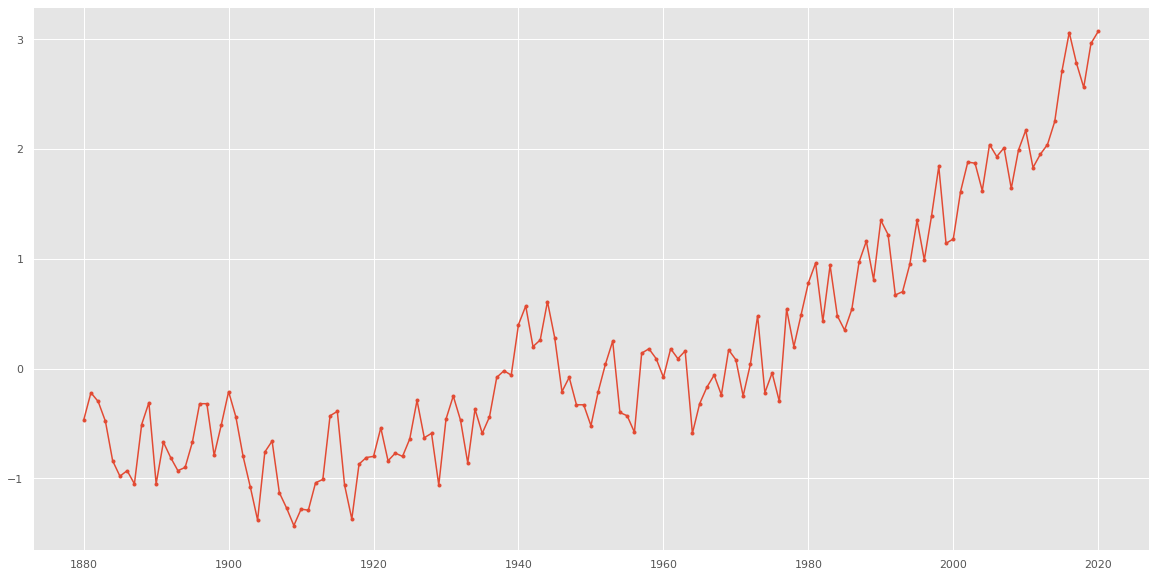

In [132]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 10))
plt.plot(Year_total_average.index, Year_total_average.values, marker='.')
plt.xlabel=('Years')
plt.ylabel=('Total Average Change by Year')
plt.title=('Average Temperature Change over the Years')
# profe si ve esto no se porque no salen los labels ni los titulos ya no supe que mas hacer.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

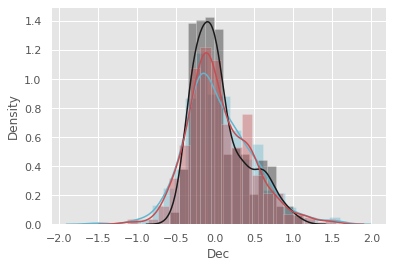

In [119]:
g=sns.distplot(df.Jan, label= 'Jan', color='c');
g=sns.distplot(df.Jul, label= 'Jun', color='k');
g=sns.distplot(df.Dec, label= 'Dec', color='r');
g.legend=()
# we have selected the firts , the middle and the last month of the year to analyse which one of them has presented the most changes in the average temperature
# over the years concluding that June is on average the month with the higher changes on temperature to positive.
# the data presented by months corresponds to the mean temperature on each month for each year 

In [120]:
# In order to  ilustrate yearly which months have been the warmer ones we need to pivot the months into rows with the method melt
df1=df.melt(id_vars=['Hemisphere',	'Year'], value_vars=['Jan',	'Feb',	'Mar',	'Apr',	'May',	'Jun',	'Jul',	'Aug',	'Sep', 'Oct',	'Nov',	'Dec',	'J-D',	'D-N',	'DJF',	'MAM',	'JJA',	'SON'],var_name='Month/Season',value_name='Mean')
df1

,Hemisphere,Year,Month/Season,Mean
0,Global,1880,Jan,-0.17
1,Global,1881,Jan,-0.18
2,Global,1882,Jan,0.18
3,Global,1883,Jan,-0.28
4,Global,1884,Jan,-0.12
...,...,...,...,...
7609,Southern,2016,SON,0.68
7610,Southern,2017,SON,0.61
7611,Southern,2018,SON,0.71
7612,Southern,2019,SON,0.72


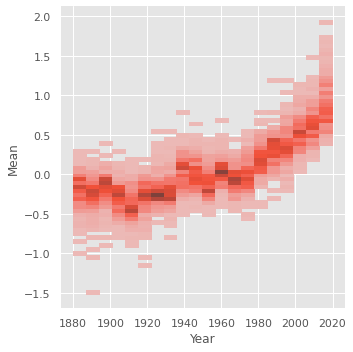

In [121]:
sns.displot(data=df1, x='Year', y='Mean');
# as we ilustrate on this plot, we can affirm that the mean temperature change over the years continues on increasing since approximately 1940
# also due to the anormal meassures in the 2020 we can appreciate that the mean is diluted.

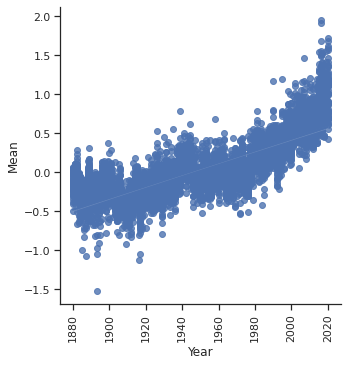

In [122]:
sns.set()
sns.set_style('dark')
sns.set_style('ticks')
sns.lmplot(x='Year',y='Mean',data=df1);
plt.xticks(rotation=90);
# with this graphic representation we can conclude that in average the temperature is changing to a positive slope, but the tendency line is not 
# accurate to predict further years due to the presence of higher changes over the last years

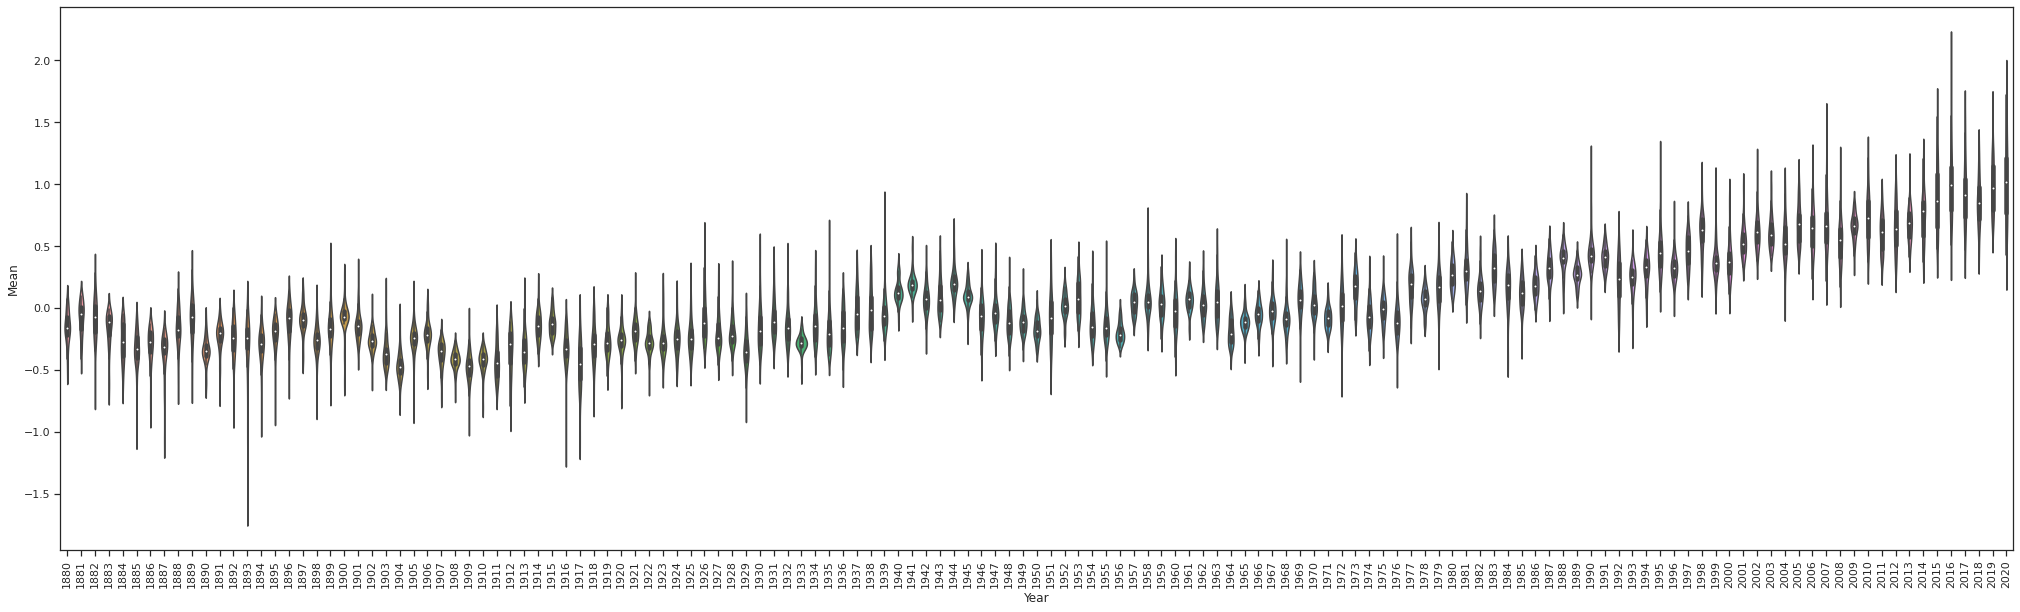

In [123]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(35, 10))
sns.set()
sns.set_style('dark')
sns.set_style('ticks')
sns.violinplot(x='Year',y='Mean',data=df1);
plt.xticks(rotation=90);

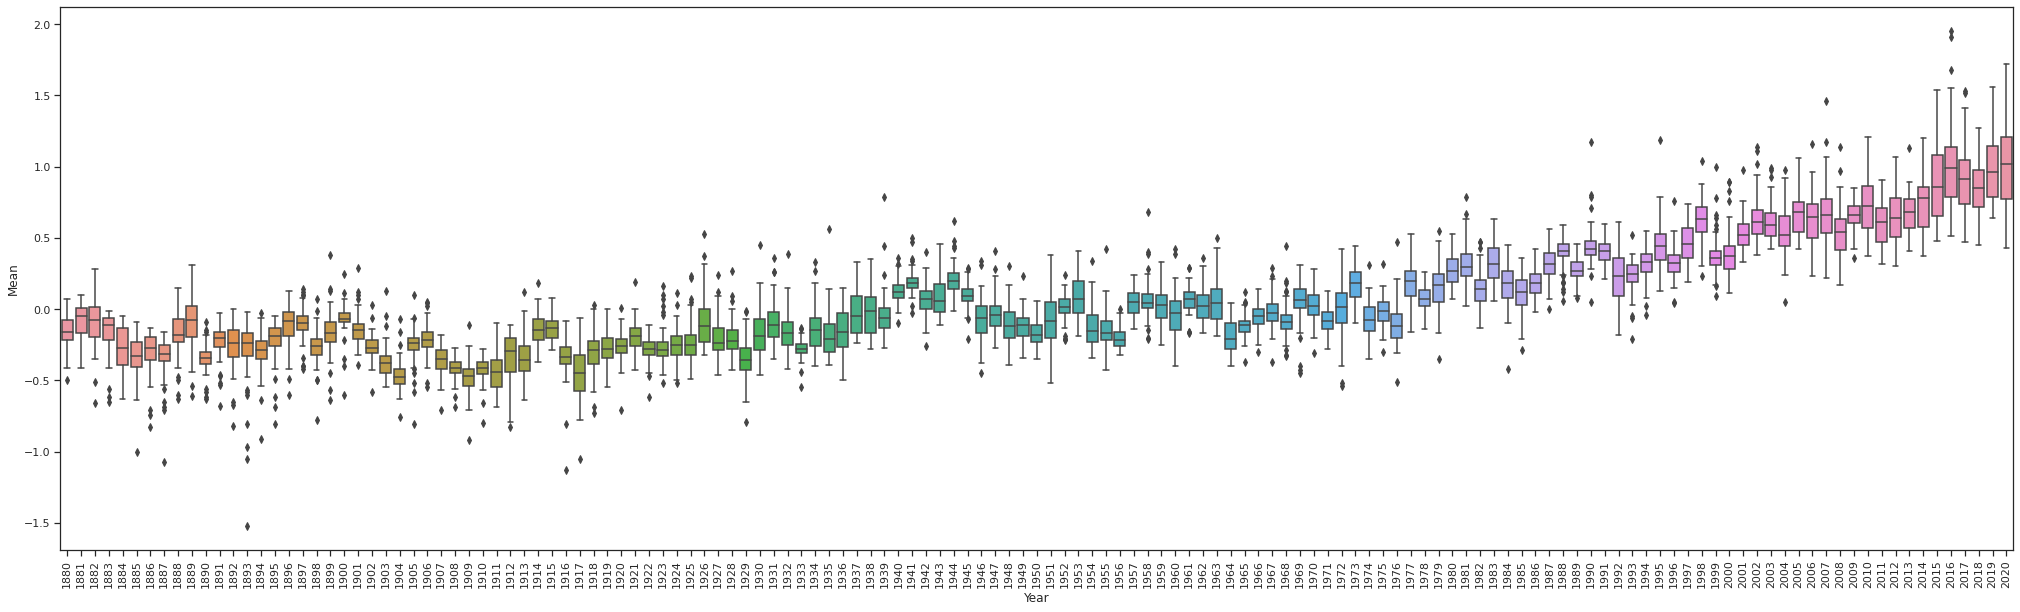

In [124]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(35, 10))
sns.set_style('white')
sns.boxplot(x='Year', y='Mean', data=df1);
plt.xticks(rotation=90);
# the outlayers corresond to the coldest months

In [125]:
# Defining the filters and agrupations to analyse the mean temperature change for hemisphere
df1_2020_filter=df1['Year']==2020
df1_1944_filter=df1['Year']==1944
Warmer_hemisphere2020=df1.loc[df1_2020_filter,:].groupby(['Hemisphere'])['Mean'].sum().sort_values(ascending = False)
Warmer_hemisphere1944=df1.loc[df1_1944_filter,:].groupby(['Hemisphere'])['Mean'].sum().sort_values(ascending = False)

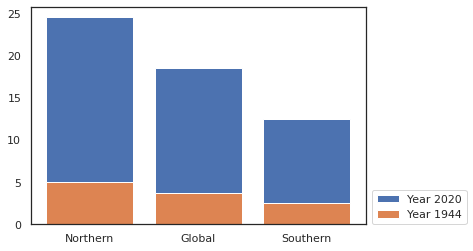

In [129]:
plt.bar(Warmer_hemisphere2020.index, Warmer_hemisphere2020.values, label= 'Year 2020');
plt.bar(Warmer_hemisphere1944.index, Warmer_hemisphere1944.values, label= 'Year 1944');
plt.title=('Sum_of_the_Monthly_Average_Temperature_Change_of_the_Warmest_Years')
plt.xlabel=('Hemisphere')
plt.ylabel=('Sum of average temperature Change in a year')
plt.legend(loc=(1.02,0))
plt.show()
# In average, the sum of temperature change on 1944 its negative compared with the averate temperature sum of 2020. Concluding that the Average change 
# over the years has changes inversely but not proportional
# also, the northern Hemishere is the one with the most positive or warmer changes for the 2020 year. In the other hand this Hemisphere is also the
# Lower in temperature change for the year 1944

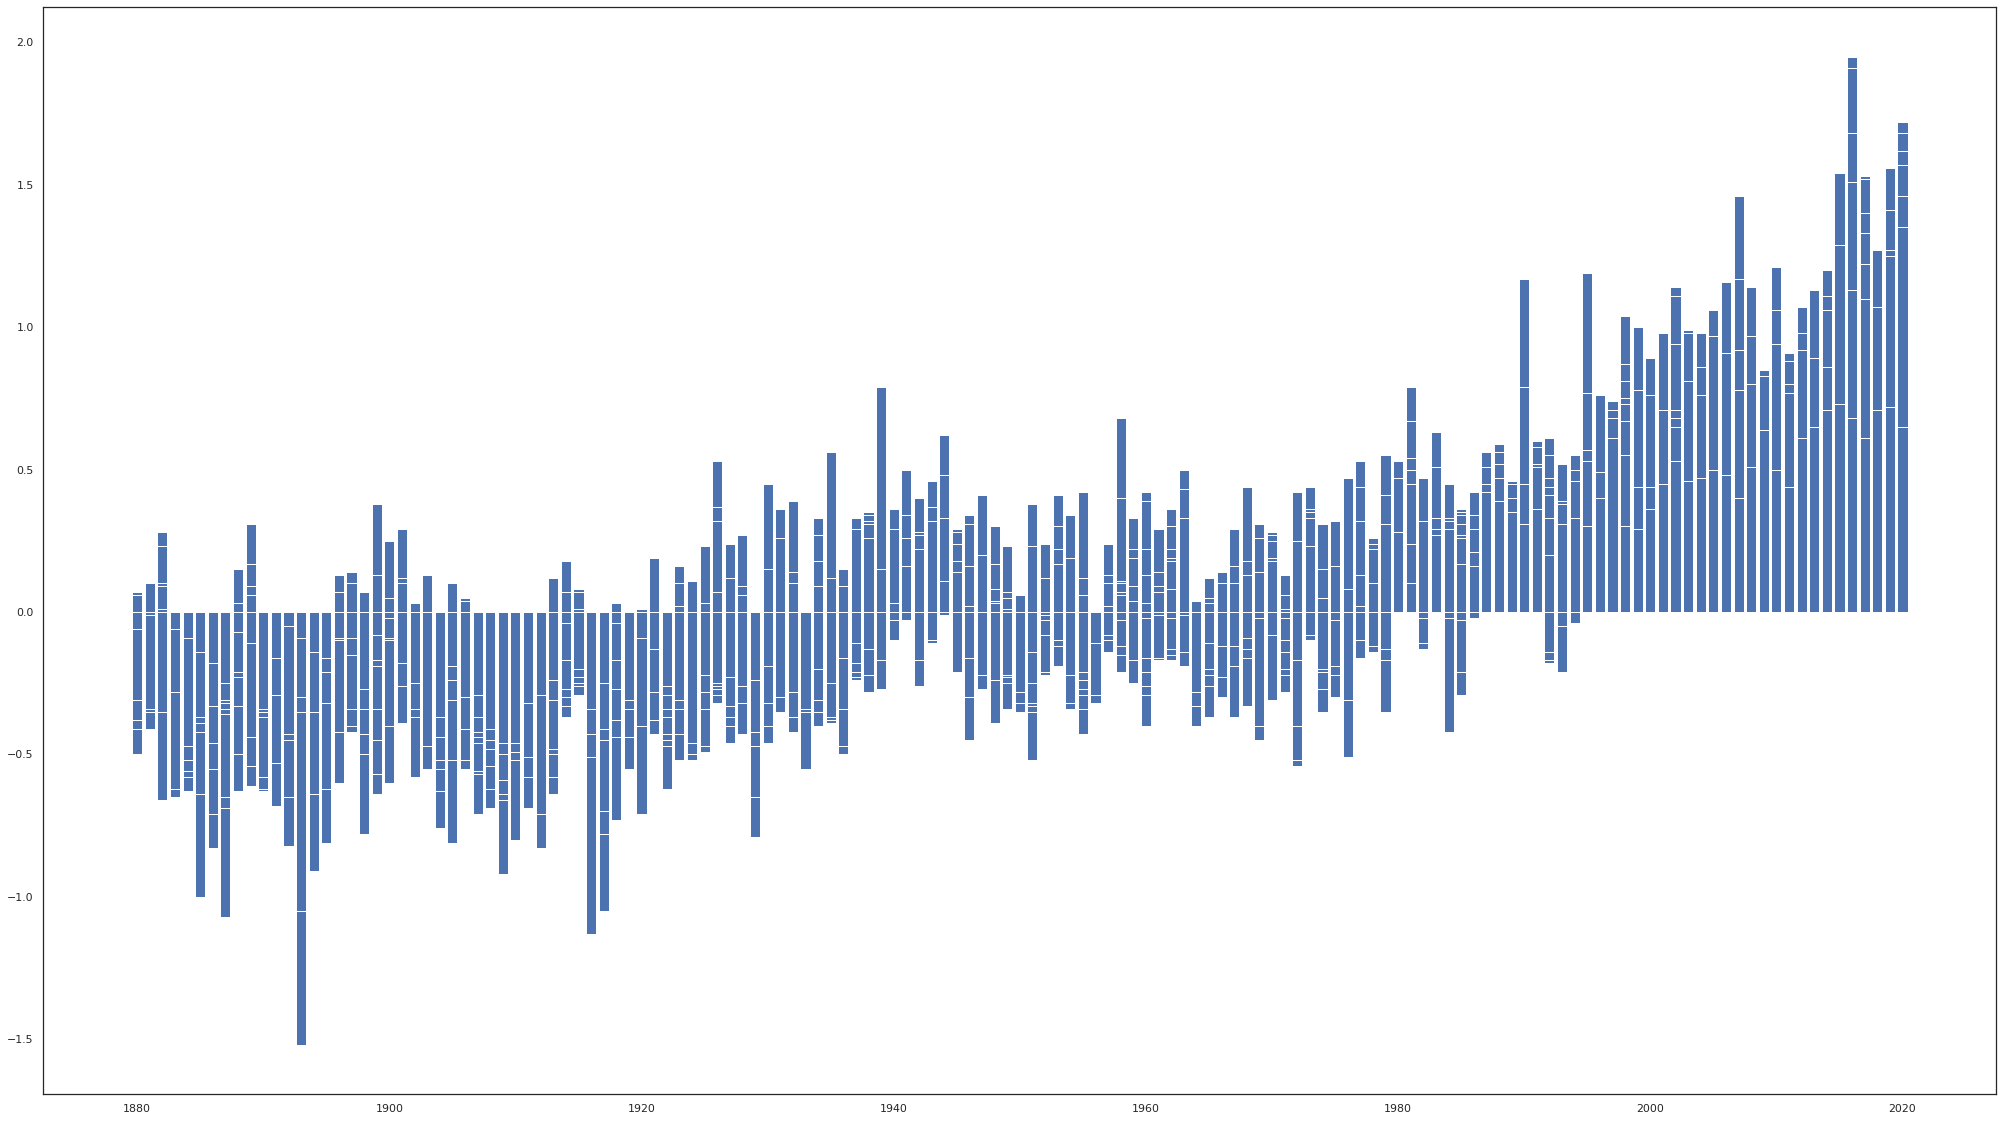

In [127]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(35, 20))
plt.bar(df1['Year'],df1['Mean'])
plt.xlabel=("Temperature average change by Year")
plt.ylabel=("Year")
plt.title=('Average Temperature Change over the Years')
plt.show()
# in average the temperature change has been negative until 1938, and since 1980 in average temperature change has been positive and increasing